<a href="https://colab.research.google.com/github/yashverma165/Meachine_learning/blob/main/Handaling_Outlier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heandling Outlier

## 5  Number Summary

1.Minimum  
2.Q1 - 25 percentile

3.Median

4.Q3 - 75 Percentile

5.Maximum

In [ ]:
import numpy as np
marks=[86,79,77,30,55,60,45,80,75,64,95,36,58,58,45,32,65,55,72,83,65,46,54,1200,1000]


In [ ]:
# Lower fence ---- Higher fence
Q1=np.percentile(marks,[25])
Q1

array([54.])

In [ ]:
Minimum,Q1,Q2,Q3,Maximum=np.quantile(marks,[0,0.25,0.50,0.75,1])

In [ ]:
Maximum

1200.0

In [ ]:
IQR=Q3-Q1
print(IQR)

25.0


In [ ]:
lower_fence=Q1-1.5*IQR
higher_fence=Q3+1.5*IQR

In [ ]:
lower_fence,higher_fence

(16.5, 116.5)

In [ ]:
outlier=[]
for i in marks:
  if i>=lower_fence and i<=higher_fence:
    print("not a outlier")
  else:
    outlier.append(i)

not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier
not a outlier


In [ ]:
import seaborn as sns

<Axes: >

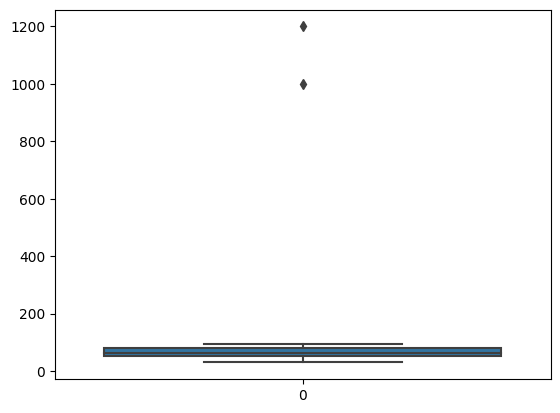

In [ ]:
sns.boxplot(marks)

In [ ]:
marks=[86,79,77,30,55,60,45,80,75,64,95,36,58,58,45,32,65,55,72,83,65,46,54]

<Axes: >

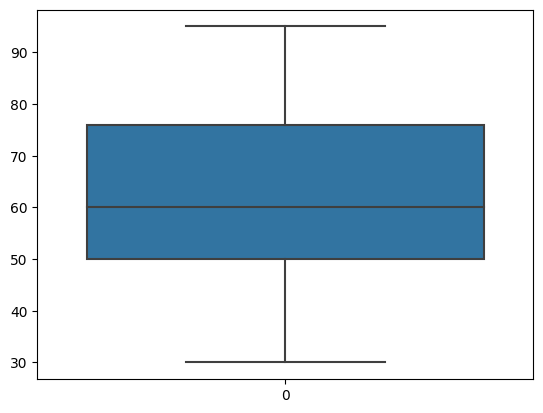

In [ ]:
sns.boxplot(marks)

# Feature Scaling
###1. Standardization

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

<Axes: xlabel='total_bill', ylabel='Count'>

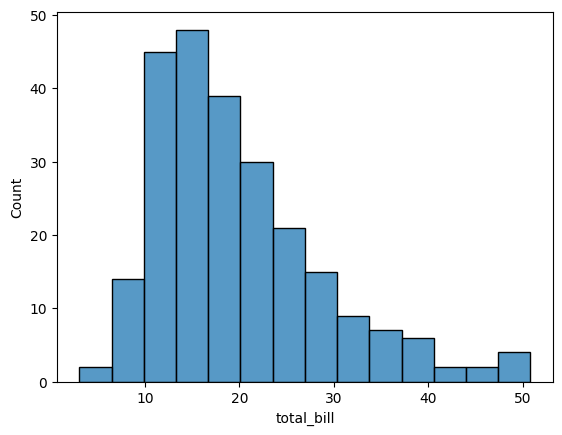

In [ ]:
sns.histplot(df['total_bill'])

In [ ]:
total_bill=list(df['total_bill'])
mean=np.mean(total_bill)
std=np.std(total_bill)
mean,std

(19.78594262295082, 8.884150577771132)

In [ ]:
data=[]
for i in total_bill:
  z_score=(i-mean)/std
  data.append(z_score)

In [ ]:
data

[-0.3147113050904943,
 -1.0632353132988692,
 0.13777989987156145,
 0.43831510316725475,
 0.540744704290506,
 0.6195367051545455,
 -1.2399545152367863,
 0.7985071071171495,
 -0.5342033074974614,
 -0.5634689078183903,
 -1.0711145133852733,
 1.7417599174609364,
 -0.49143050702841123,
 -0.15262490331304146,
 -0.557840907756673,
 0.2019391005751361,
 -1.0643609133112126,
 -0.3935033059545337,
 -0.31696250511518104,
 0.09725829942719795,
 -0.2100305039425557,
 0.05673669898283484,
 -0.45203450659639155,
 2.2100095225958003,
 0.003833498402694168,
 -0.2224121040783337,
 -0.7221785095588127,
 -0.7987193103981653,
 0.21544630072325727,
 -0.015301701807144186,
 -1.1521577142739994,
 -0.16162970341178864,
 -0.5319521074727743,
 0.10176069947657193,
 -0.22578890411536368,
 0.4810879036363046,
 -0.3912521059298469,
 -0.32146490516455467,
 -0.12335930299211233,
 1.2926455125359115,
 -0.4216433062631192,
 -0.2618081045103532,
 -0.6580193088552376,
 -1.137524914113535,
 1.1947183114620337,
 -0.1683833

<Axes: ylabel='Count'>

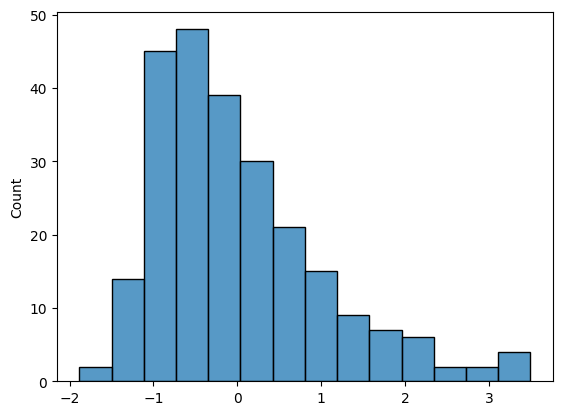

In [ ]:
sns.histplot(data)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df[['total_bill','tip']])

StandardScaler()

In [ ]:
pd.DataFrame(scaler.transform(df[['total_bill','tip']]),columns=['total_bills','tips'])

,total_bills,tips
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


#2. Normilization - MinMaxScaler

In [ ]:
df1=sns.load_dataset('taxis')
df1

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max=MinMaxScaler()

In [ ]:
min_max.fit(df1[['distance'	,'fare'	,'tip'	,'tolls',	'total']])

MinMaxScaler()

In [ ]:
min_max.transform(df1[['distance'	,'fare'	,'tip'	,'tolls',	'total']])

array([[0.04359673, 0.04026846, 0.06475904, 0.        , 0.06713923],
       [0.02152589, 0.02684564, 0.        , 0.        , 0.0461042 ],
       [0.0373297 , 0.04362416, 0.07108434, 0.        , 0.07411249],
       ...,
       [0.11280654, 0.10067114, 0.        , 0.        , 0.09220839],
       [0.03051771, 0.03355705, 0.        , 0.        , 0.03169663],
       [0.10490463, 0.09395973, 0.10120482, 0.        , 0.10869064]])

In [ ]:
# both fir and transform at the same time
min_max.fit_transform(df1[['distance'	,'fare'	,'tip'	,'tolls',	'total']])

array([[0.04359673, 0.04026846, 0.06475904, 0.        , 0.06713923],
       [0.02152589, 0.02684564, 0.        , 0.        , 0.0461042 ],
       [0.0373297 , 0.04362416, 0.07108434, 0.        , 0.07411249],
       ...,
       [0.11280654, 0.10067114, 0.        , 0.        , 0.09220839],
       [0.03051771, 0.03355705, 0.        , 0.        , 0.03169663],
       [0.10490463, 0.09395973, 0.10120482, 0.        , 0.10869064]])

# 3. Unit Vector

In [ ]:
df3=sns.load_dataset('iris')

In [ ]:
df3.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
df3.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
pd.DataFrame(normalize(df3.iloc[:,:-1]),columns=['sepal_length','sepal_width'	,'petal_length',	'petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281
